# Normal Equation Method

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Normal Equation for Linear Regression:**

The Normal Equation provides a closed-form solution for $\mathbf{\theta}$ :
$$
\mathbf{\theta} = \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T \mathbf{y}
$$


## Implementation

In [16]:
class LinearRegression_NE:
    
    def __init__(self):
        self.weights = None

    def fit(self,X,y):
        m = X.shape[0]
        X = np.hstack((np.ones((m,1)),np.array(X)))  # Creating column of 1's for bias term
        y = np.array(y).reshape(-1)

        self.weights = np.linalg.pinv(X.T@X)@(X.T@y)

    def predict(self,X):
        if self.weights is None:
            raise ValueError("Model has not been fitted yet")
            
        m = X.shape[0]
        X = np.hstack((np.ones((m,1)),np.array(X)))
        return X@self.weights
    
    def get_weights(self):
        return self.weights


## Sample Data Test & Comparison

In [17]:
from sklearn.linear_model import LinearRegression

# Sample DataFrame with features and a target column
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 1, 3, 5, 4],
    'Feature3': [5, 3, 2, 4, 1],
    'Target':    [10, 9, 15, 21, 19]
}

df = pd.DataFrame(data)

# Prepare X and y
X = df[['Feature1','Feature2','Feature3']].values
y = df['Target'].values

In [18]:
# Implemented Linear Regression Model
model_ne = LinearRegression_NE()
model_ne.fit(X, y)
predictions_ne = model_ne.predict(X)

print("Predictions from Normal Equation model:", predictions_ne)

# Scikit-learn Linear Regression for comparison
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
predictions_sklearn = model_sklearn.predict(X)

print("Predictions from scikit-learn model:", predictions_sklearn)


Predictions from Normal Equation model: [10.3  8.8 14.8 20.8 19.3]
Predictions from scikit-learn model: [10.3  8.8 14.8 20.8 19.3]


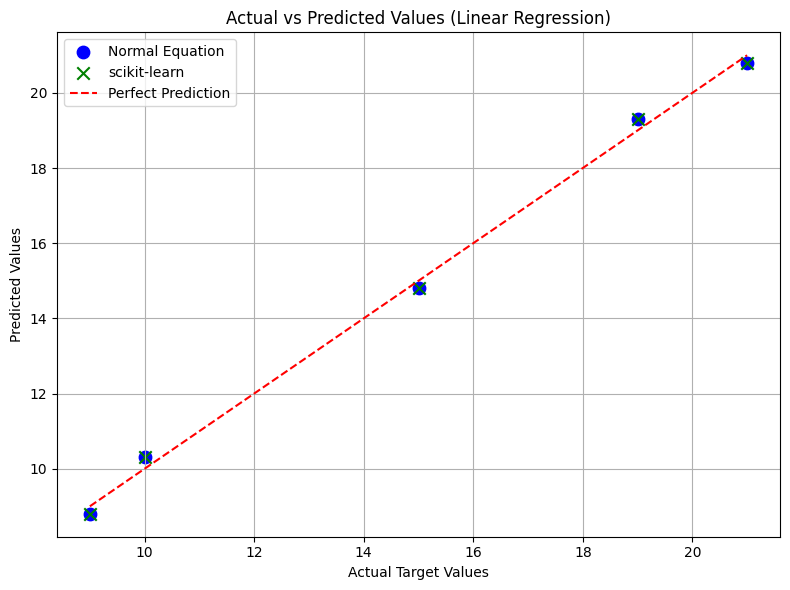

In [19]:
# Plotting the results

plt.figure(figsize=(8, 6))
plt.scatter(y, predictions_ne, color='blue', label='Normal Equation', marker='o', s=80)
plt.scatter(y, predictions_sklearn, color='green', label='scikit-learn', marker='x', s=80)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
print("Learned Weights from Normal Equation model:", model_ne.get_weights())
print("Learned Weights from scikit-learn model:", [model_sklearn.intercept_] + list(model_sklearn.coef_))

Learned Weights from Normal Equation model: [4.30000000e+00 1.00000000e+00 2.50000000e+00 5.68434189e-14]
Learned Weights from scikit-learn model: [4.300000000000001, 0.9999999999999998, 2.500000000000001, -6.275240856268005e-16]


The tiny differences (e.g., 5.68e-14 or -6.27e-16) are due to floating-point precision.

# Gradient Descent 

Gradient Descent updates the parameters iteratively using:  

$$
\theta := \theta - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta}
$$  

Where:  
- $\alpha$ = learning rate (controls step size)  
- $\frac{\partial J(\theta)}{\partial \theta}$ = gradient of the cost function w.r.t. parameters  

For Linear Regression, the gradient can be expressed as:  

$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T (X\theta - y)
$$  

In [39]:
class LinearRegression_GD:

    def __init__(self,*,alpha = 0.01,max_iter = 1000, tol = 0.001):
        self.weights = None
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.loss_history = []
    
    def fit(self,X,y):
        n = X.shape[0]  # No. of data-points
        m = X.shape[1]  # No. of features
        self.weights = np.zeros(m+1)

        X = np.hstack((np.ones((n,1)),np.array(X)))
        y = np.array(y).reshape(-1)

        for _ in range(self.max_iter):
            residuals = X@self.weights - y
            ssr = (1/(2*n)) * (residuals.T @ residuals)   # Sum of squared residuals (Scaled by 1/2 for calculation simplicity)
            self.loss_history.append(ssr)

            if ssr < self.tol:
                break

            gradients = (1/n) * (X.T @ residuals)
            self.weights = self.weights - self.alpha * gradients

    def predict(self,X):
        if self.weights is None:
            raise ValueError("Model has not been fitted yet")
        n = X.shape[0]
        X = np.hstack((np.ones((n,1)),np.array(X)))
        return X@self.weights

    def get_weights(self):
        return self.weights

In [45]:
# Implemented Linear Regression Model (Normal Equation)
model_ne = LinearRegression_NE()
model_ne.fit(X, y)
predictions_ne = model_ne.predict(X)

print("Predictions from Normal Equation model:", predictions_ne)

# Implemented Linear Regression Model (Gradient Descent)
model_gd = LinearRegression_GD(alpha = 0.01, max_iter = 50000, tol = 1e-10)
model_gd.fit(X, y)
predictions_gd = model_gd.predict(X)

print("Predictions from Gradient Descent model:", predictions_gd)

# Scikit-learn Linear Regression for comparison
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
predictions_sklearn = model_sklearn.predict(X)

print("Predictions from scikit-learn model:", predictions_sklearn)

Predictions from Normal Equation model: [10.3  8.8 14.8 20.8 19.3]
Predictions from Gradient Descent model: [10.29941385  8.8008505  14.79735742 20.801375   19.3003081 ]
Predictions from scikit-learn model: [10.3  8.8 14.8 20.8 19.3]


## Loss Convergence

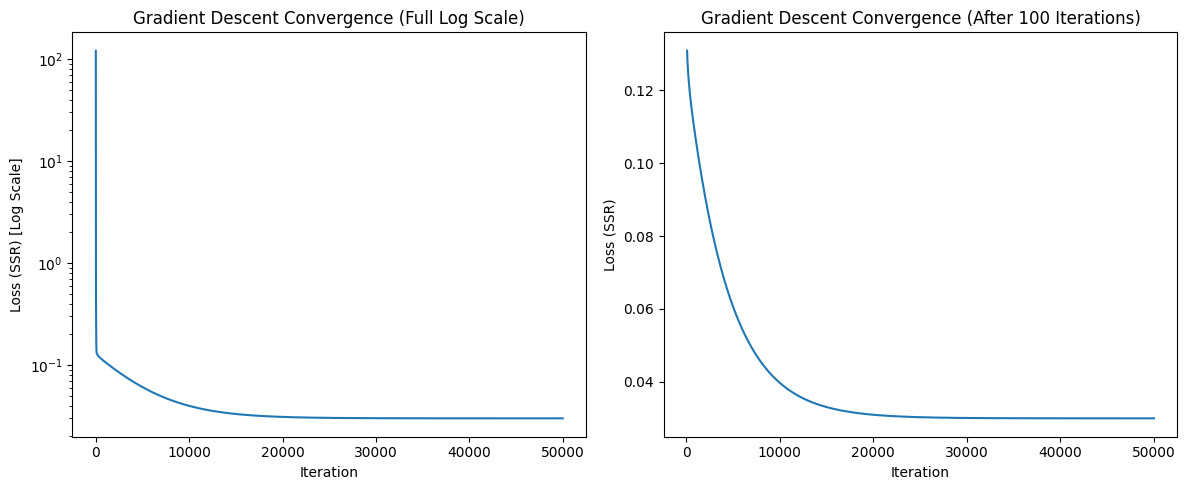

In [50]:
# Full log-scale loss curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log scale plot for overall trend
axes[0].plot(model_gd.loss_history)
axes[0].set_yscale("log")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Loss (SSR) [Log Scale]")
axes[0].set_title("Gradient Descent Convergence (Full Log Scale)")

# Zoomed-in plot for final convergence phase
skip = 100  # skip first iterations
axes[1].plot(range(skip, len(model_gd.loss_history)), model_gd.loss_history[skip:])
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Loss (SSR)")
axes[1].set_title(f"Gradient Descent Convergence (After {skip} Iterations)")

plt.tight_layout()
plt.show()


## Models Comparison

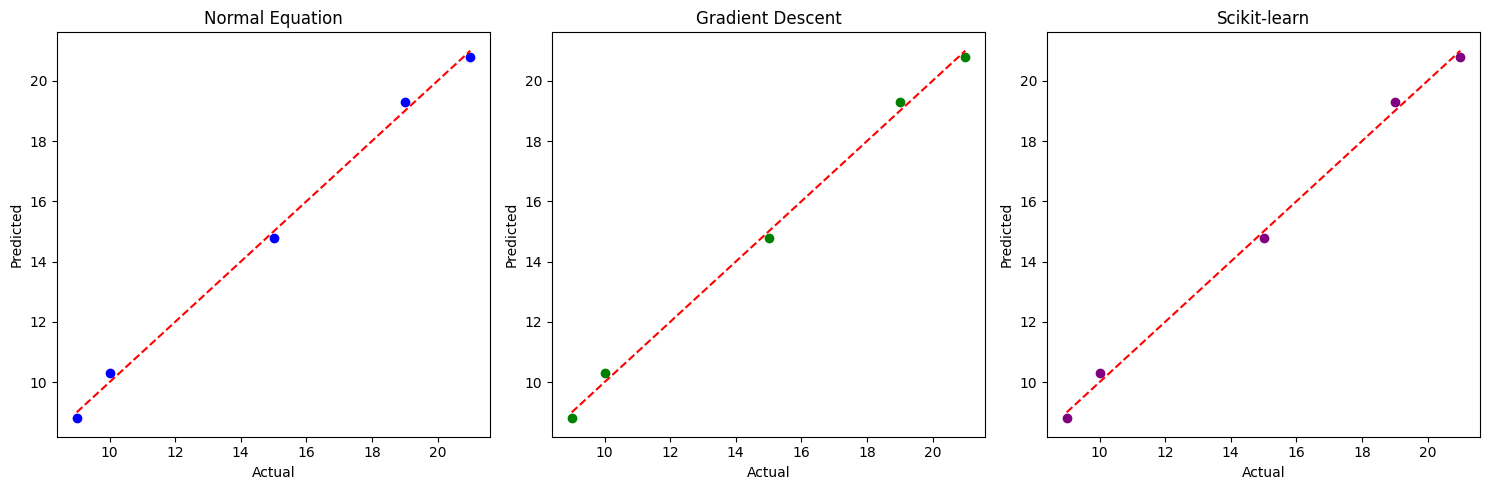

In [51]:
# Create plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Normal Equation
axes[0].scatter(y, predictions_ne, color='blue')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect line
axes[0].set_title("Normal Equation")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Gradient Descent
axes[1].scatter(y, predictions_gd, color='green')
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[1].set_title("Gradient Descent")
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")

# Scikit-learn
axes[2].scatter(y, predictions_sklearn, color='purple')
axes[2].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[2].set_title("Scikit-learn")
axes[2].set_xlabel("Actual")
axes[2].set_ylabel("Predicted")

plt.tight_layout()
plt.show()


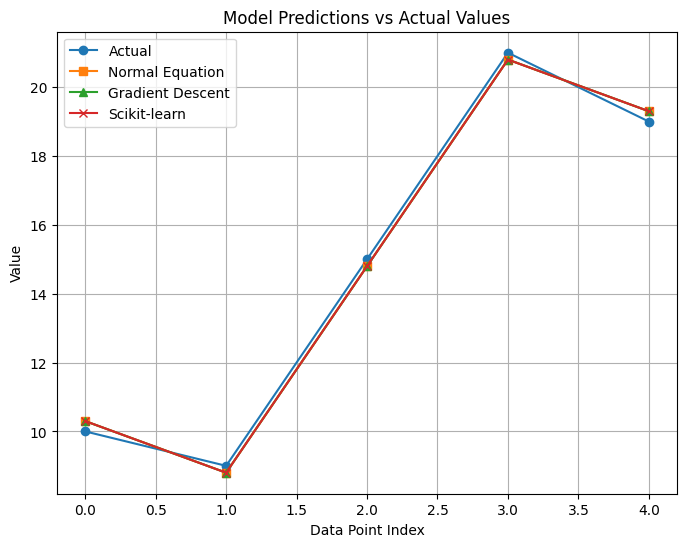

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(y, label="Actual", marker='o')
plt.plot(predictions_ne, label="Normal Equation", marker='s')
plt.plot(predictions_gd, label="Gradient Descent", marker='^')
plt.plot(predictions_sklearn, label="Scikit-learn", marker='x')

plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Model Predictions vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()